In [4]:

import os
import shutil
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read all the file names in the folder
def read_file_names(folder_name):
    file_list = glob.glob(folder_name + '/*')
    return file_list



In [3]:
#get the list of only the file names in the folder without the path
def get_file_names(file_list):
    file_names = []
    for file in file_list:
        file_names.append(os.path.basename(file))
    return file_names


In [1]:
#add a text in front of the file name using os
def add_text_in_front_of_file_name(folder_name, text):
    file_list = read_file_names(folder_name)
    for file in file_list:
        file_name = os.path.basename(file)
        new_file_name = text + file_name
        new_file_name = os.path.join(folder_name, new_file_name)
        os.rename(file, new_file_name)
    return



In [13]:
im_names = read_file_names('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\images')
vid_names = get_file_names(im_names)
print(vid_names[1])

Bago_highway_10


In [14]:
#function  to remove 0 from the filename except 10 and 100

def remove_zero_from_file_name(folder_name):
    file_list = read_file_names(folder_name)
    for file in file_list:
        file_name = os.path.basename(file)
        if file_name[0] == '0':
            if file_name[1] == '0':
                new_file_name = file_name[2:]
            else:
                new_file_name = file_name[1:]
            new_file_name = os.path.join(folder_name, new_file_name)
            os.rename(file, new_file_name)
    return


In [15]:
for i in vid_names:
    path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\images\\' + i
    print(path)
    remove_zero_from_file_name(path)
    x = str(i) + "_" 
    add_text_in_front_of_file_name(path, x)


C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_1
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_10
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_11
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_12
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_13
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_14
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_15
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_16
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_17
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_18
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_19
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_2
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_20
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_21
C:\Users\arnes\Desktop\DATA\HELMET_DATASET\images\Bago_highway_22
C:\Users\arn

In [16]:
to_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\img_data'
os.mkdir(to_path)

In [17]:
#move files form one folder to another
def move_files(from_path, to_path):
    file_list = read_file_names(from_path)
    for file in file_list:
        file_name = os.path.basename(file)
        new_file_name = os.path.join(to_path, file_name)
        shutil.move(file, new_file_name)
    return

for i in vid_names:
    from_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\images\\' + i
    move_files(from_path, to_path)

In [25]:
annotations_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotation'
annotations = read_file_names(annotations_path)
annotations_names = get_file_names(annotations)
print(annotations_names[1])

Bago_highway_10.csv


In [27]:
#add a text in front of every value in a column in a csv file
def add_text_in_front_of_column_value(file_name, column_name, text):
    df = pd.read_csv(file_name)
    df[column_name] = text[:-4] + "_"+ df[column_name].astype(str)
    df.to_csv(file_name, index=False)
    return

for i in annotations_names:
    path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotation\\' + i 
    add_text_in_front_of_column_value(path, 'frame_id', i)

In [54]:
#concatenate all the csv files in 1 csv file
def concatenate_csv_files(file_list, output_file):
    df = pd.concat([pd.read_csv(file) for file in file_list])
    df.to_csv(output_file, index=False)
    return

concatenate_csv_files(annotations, 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv')

In [55]:
#no of unique frame_id in the csv file
df = pd.read_csv('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv')
df['frame_id'].nunique()


81374

In [29]:
#plot 1 image and bounding box with the text 

def plot_image_and_bounding_box(image_path, annotation_path, frame_id):
    df = pd.read_csv(annotation_path)
    df = df[df['frame_id'] == frame_id]
    print(df[df['frame_id'] == frame_id])
    df = df.reset_index(drop=True)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    #also write the label of the bounding box

    for i in range(len(df)):
        x = df['x'][i]
        y = df['y'][i]
        w = df['w'][i]
        h = df['h'][i]
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
        plt.text(x, y, df['label'][i], color='r' , size=7 , backgroundcolor='none')
    plt.show()
    return

       track_id          frame_id     x    y    w    h  \
0    _x4f29hsem  Bago_highway_1_1   843  637  163  220   
109  _q4b18swgd  Bago_highway_1_1  1497  629  217  282   
142  _q6v32gn0z  Bago_highway_1_1   267  684  147  201   
242  _ov2h9m3ux  Bago_highway_1_1   373  676  180  199   
342  _ol6avrrr2  Bago_highway_1_1  1441  613   62  103   

                             label  
0    DNoHelmetP1NoHelmetP2NoHelmet  
109                        DHelmet  
142                      DNoHelmet  
242                      DNoHelmet  
342                        DHelmet  


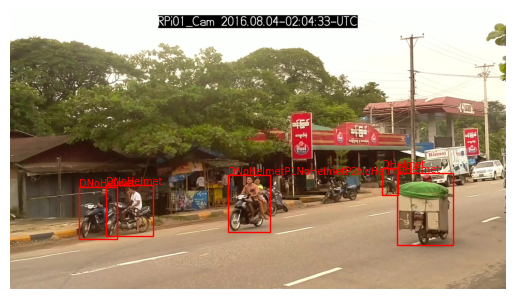

In [32]:


image_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\img_data\\Bago_highway_1_1.jpg'
annotation_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv'

plot_image_and_bounding_box(image_path, annotation_path, 'Bago_highway_1_1')


In [33]:
#unique classes in the dataset
def unique_classes(file_name):
    df = pd.read_csv(file_name)
    unique_classes = df['label'].unique()
    return unique_classes

labels = unique_classes('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv')
print(labels)

['DNoHelmetP1NoHelmetP2NoHelmet' 'DNoHelmet' 'DHelmet' 'DHelmetP1Helmet'
 'DNoHelmetP0NoHelmetP1NoHelmet' 'DNoHelmetP1NoHelmet' 'DNoHelmetP1Helmet'
 'DHelmetP1NoHelmetP2Helmet' 'DHelmetP1NoHelmet'
 'DHelmetP1NoHelmetP2NoHelmet' 'DHelmetP0NoHelmetP1NoHelmetP2Helmet'
 'DHelmetP0NoHelmetP1NoHelmet' 'DNoHelmetP0NoHelmetP1NoHelmetP2NoHelmet'
 'DHelmetP0NoHelmet' 'DNoHelmetP0NoHelmet' 'DHelmetP1HelmetP2Helmet'
 'DNoHelmetP1HelmetP2Helmet' 'DHelmetP0NoHelmetP1Helmet'
 'DHelmetP0NoHelmetP1NoHelmetP2NoHelmet'
 'DHelmetP0HelmetP1NoHelmetP2Helmet' 'DHelmetP0HelmetP1HelmetP2Helmet'
 'DHelmetP0HelmetP1Helmet' 'DHelmetP1HelmetP2NoHelmet'
 'DNoHelmetP1NoHelmetP2NoHelmetP3NoHelmet' 'DHelmetP0Helmet'
 'DHelmetP0HelmetP1NoHelmetP2NoHelmet' 'DNoHelmetP0NoHelmetP1Helmet'
 'DHelmetP0NoHelmetP1NoHelmetP2NoHelmetP3NoHelmet'
 'DNoHelmetP1NoHelmetP2Helmet' 'DHelmetP1NoHelmetP2NoHelmetP3NoHelmet'
 'DHelmetP1NoHelmetP2NoHelmetP3Helmet'
 'DNoHelmetP0NoHelmetP1NoHelmetP2NoHelmetP3NoHelmet'
 'DHelmetP0NoHelmetP1Hel

In [34]:
#make a dictionary of the classes
def make_dictionary_of_classes(file_name):
    df = pd.read_csv(file_name)
    unique_classes = df['label'].unique()
    dictionary = {}
    for i in range(len(unique_classes)):
        dictionary[unique_classes[i]] = i
    return dictionary

dictionary = make_dictionary_of_classes('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv')
print(dictionary)

{'DNoHelmetP1NoHelmetP2NoHelmet': 0, 'DNoHelmet': 1, 'DHelmet': 2, 'DHelmetP1Helmet': 3, 'DNoHelmetP0NoHelmetP1NoHelmet': 4, 'DNoHelmetP1NoHelmet': 5, 'DNoHelmetP1Helmet': 6, 'DHelmetP1NoHelmetP2Helmet': 7, 'DHelmetP1NoHelmet': 8, 'DHelmetP1NoHelmetP2NoHelmet': 9, 'DHelmetP0NoHelmetP1NoHelmetP2Helmet': 10, 'DHelmetP0NoHelmetP1NoHelmet': 11, 'DNoHelmetP0NoHelmetP1NoHelmetP2NoHelmet': 12, 'DHelmetP0NoHelmet': 13, 'DNoHelmetP0NoHelmet': 14, 'DHelmetP1HelmetP2Helmet': 15, 'DNoHelmetP1HelmetP2Helmet': 16, 'DHelmetP0NoHelmetP1Helmet': 17, 'DHelmetP0NoHelmetP1NoHelmetP2NoHelmet': 18, 'DHelmetP0HelmetP1NoHelmetP2Helmet': 19, 'DHelmetP0HelmetP1HelmetP2Helmet': 20, 'DHelmetP0HelmetP1Helmet': 21, 'DHelmetP1HelmetP2NoHelmet': 22, 'DNoHelmetP1NoHelmetP2NoHelmetP3NoHelmet': 23, 'DHelmetP0Helmet': 24, 'DHelmetP0HelmetP1NoHelmetP2NoHelmet': 25, 'DNoHelmetP0NoHelmetP1Helmet': 26, 'DHelmetP0NoHelmetP1NoHelmetP2NoHelmetP3NoHelmet': 27, 'DNoHelmetP1NoHelmetP2Helmet': 28, 'DHelmetP1NoHelmetP2NoHelmetP3NoHe

In [35]:
#convert the dataset into the yoloc8 format
def convert_dataset_to_yoloc8_format(file_name, dictionary):
    df = pd.read_csv(file_name)
    df['label'] = df['label'].map(dictionary)
    df.to_csv(file_name, index=False)
    return

convert_dataset_to_yoloc8_format('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv', dictionary)




In [36]:
os.makedirs('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id')

In [37]:
#check no of unique frame_id
def check_no_of_unique_frame_id(file_name):
    df = pd.read_csv(file_name)
    unique_frame_id = df['frame_id'].unique()
    return unique_frame_id

unique_frame_id = check_no_of_unique_frame_id('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv')
print(len(unique_frame_id))

81374


In [38]:
#seperate csv files by frame_id into a new folder
def seperate_csv_files_by_frame_id(file_name, folder_name):
    df = pd.read_csv(file_name)
    unique_frame_ids = df['frame_id'].unique()
    for i in range(len(unique_frame_ids)):
        df[df['frame_id'] == unique_frame_ids[i]].to_csv(folder_name + '\\' + unique_frame_ids[i] + '.csv', index=False)
    return

seperate_csv_files_by_frame_id('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations.csv', 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id')

In [39]:
#create a text file with center_x center_y width height fro annotations_by_frame_id folder
def create_text_file_with_center_x_center_y_width_height(file_name, folder_name):
    df = pd.read_csv(file_name)
    #ignore key error
    try:
        df = df[['label', 'x', 'y', 'w', 'h']]
        df['x'] = df['x'] + df['w']/2
        df['y'] = df['y'] + df['h']/2
        #save to text file usimg numpy without .csv
        np.savetxt(folder_name + '\\' + os.path.basename(file_name)[:-4] + '.txt', df.values, fmt=['%d', '%f', '%f', '%f', '%f'])
    except KeyError:
        return 

annotations_by_frame_id = read_file_names('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id')
for i in annotations_by_frame_id:
    create_text_file_with_center_x_center_y_width_height(i, 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id')

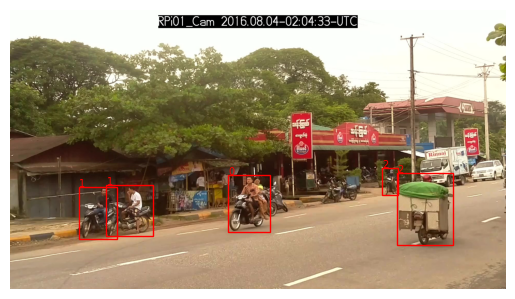

In [40]:
#plot image and bounding box using csv file with label, x, y, w, h
def plot_image_and_bounding_box_using_csv_file_with_label_x_y_w_h(image_path, annotation_path):
    df = pd.read_csv(annotation_path)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    for i in range(len(df)):
        x = df['x'][i]
        y = df['y'][i]
        w = df['w'][i]
        h = df['h'][i]
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
        plt.text(x, y, df['label'][i], color='r' , size=7 , backgroundcolor='none')
    plt.show()
    return

image_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\img_data\\Bago_highway_1_1.jpg'
annotation_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id\\Bago_highway_1_1.csv'
plot_image_and_bounding_box_using_csv_file_with_label_x_y_w_h(image_path, annotation_path)


In [41]:
labels

array(['DNoHelmetP1NoHelmetP2NoHelmet', 'DNoHelmet', 'DHelmet',
       'DHelmetP1Helmet', 'DNoHelmetP0NoHelmetP1NoHelmet',
       'DNoHelmetP1NoHelmet', 'DNoHelmetP1Helmet',
       'DHelmetP1NoHelmetP2Helmet', 'DHelmetP1NoHelmet',
       'DHelmetP1NoHelmetP2NoHelmet',
       'DHelmetP0NoHelmetP1NoHelmetP2Helmet',
       'DHelmetP0NoHelmetP1NoHelmet',
       'DNoHelmetP0NoHelmetP1NoHelmetP2NoHelmet', 'DHelmetP0NoHelmet',
       'DNoHelmetP0NoHelmet', 'DHelmetP1HelmetP2Helmet',
       'DNoHelmetP1HelmetP2Helmet', 'DHelmetP0NoHelmetP1Helmet',
       'DHelmetP0NoHelmetP1NoHelmetP2NoHelmet',
       'DHelmetP0HelmetP1NoHelmetP2Helmet',
       'DHelmetP0HelmetP1HelmetP2Helmet', 'DHelmetP0HelmetP1Helmet',
       'DHelmetP1HelmetP2NoHelmet',
       'DNoHelmetP1NoHelmetP2NoHelmetP3NoHelmet', 'DHelmetP0Helmet',
       'DHelmetP0HelmetP1NoHelmetP2NoHelmet',
       'DNoHelmetP0NoHelmetP1Helmet',
       'DHelmetP0NoHelmetP1NoHelmetP2NoHelmetP3NoHelmet',
       'DNoHelmetP1NoHelmetP2Helmet',
       '

In [42]:
len(labels)

36

In [43]:
#delete all csv files in a folder
def delete_all_csv_files_in_a_folder(folder_name):
    file_list = read_file_names(folder_name)
    for file in file_list:
        if file[-4:] == '.csv':
            os.remove(file)
    return

delete_all_csv_files_in_a_folder('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\annotations_by_frame_id')


In [45]:
#creat yolov8 folder
os.makedirs('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8')

In [46]:
#generate config.yaml file in yolov8 format
def generate_config_yaml_file_in_yolov8_format(file_name, classes):
    f = open(file_name, 'w')
    f.write('train: ../train/images\n')
    f.write('val: ../train/images\n')
    f.write('nc: ' + str(classes) + '\n')
    f.write('names:' + '\n')
    for i in range(len(labels)):
        f.write('    '  + str(i) + ":"  + labels[i]  + ',\n')
    f.write(']' + '\n')
    f.close()
    return

generate_config_yaml_file_in_yolov8_format('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\config.yaml', len(labels))


In [47]:
#create a train fooder and a val folder
def create_train_folder_and_val_folder(folder_name):
    os.mkdir(folder_name + '\\train')
    os.mkdir(folder_name + '\\val')
    return



In [48]:
#transfer images to train folder and val folder
def transfer_images_to_train_folder_and_val_folder(folder_name, train_folder, val_folder):
    file_list = read_file_names(folder_name)
    for i in range(len(file_list)):
        if i % 10 == 0:
            shutil.copy(file_list[i], val_folder)
        else:
            shutil.copy(file_list[i], train_folder)
    return

create_train_folder_and_val_folder('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8')
transfer_images_to_train_folder_and_val_folder('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\img_data', 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\train', 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\val')



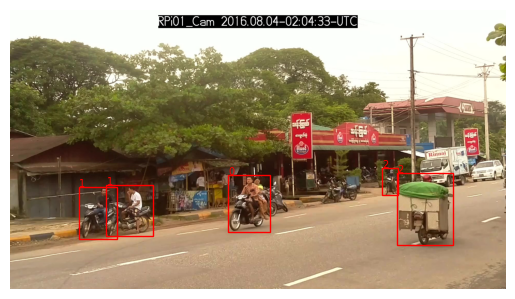

(1080, 1920, 3)


In [8]:
#plot image with bounding box using yolov8 format
def plot_image_with_bounding_box_using_yolov8_format(image_path, annotation_path):
    #read txt  file with x-center, y-center, width, height  
    df = pd.read_csv(annotation_path, header=None, sep=' ')
    #convert to x, y, w, h
    df[1] = df[1] - df[3]/2
    df[2] = df[2] - df[4]/2
    #read image
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    #plot bounding box and label
    for i in range(len(df)):
        x = df[1][i]
        y = df[2][i]
        w = df[3][i]
        h = df[4][i]
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
        plt.text(x, y, df[0][i], color='r' , size=7 , backgroundcolor='none')
    plt.show()


    return

image_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\img_data\\Bago_highway_11.jpg'
annotation_path = 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\labels\\val\\Bago_highway_11.txt'
plot_image_with_bounding_box_using_yolov8_format(image_path, annotation_path)




In [1]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [56]:
#normalize labels in yolov8 format
def normalize_labels_in_yolov8_format(file_name, image_path):
    df = pd.read_csv(file_name, header=None, sep=' ')
    image = plt.imread(image_path)
    height, width, _ = image.shape
    df[1] = df[1]/width
    df[2] = df[2]/height
    df[3] = df[3]/width
    df[4] = df[4]/height
    df.to_csv(file_name, header=None, index=False, sep=' ')
    return

#normalize labels in yolov8 format for all the files in a folder where imagees are in different folder
def normalize_labels_in_yolov8_format_for_all_the_files_in_a_folder(folder_name, image_folder_name):
    file_list = read_file_names(folder_name)
    for file in file_list:
        image_path = os.path.join(image_folder_name, os.path.basename(file)[:-4] + '.jpg')
        normalize_labels_in_yolov8_format(file, image_path)
    return

normalize_labels_in_yolov8_format_for_all_the_files_in_a_folder('C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\labels\\train', 'C:\\Users\\arnes\\Desktop\\DATA\\HELMET_DATASET\\yolov8\\images\\train')
